In [2]:
import glob
import gzip
import pandas as pd
from tqdm.notebook import tqdm
from Bio import SeqIO

# 汇总Candidate信息

## 合并文件并保存

In [2]:
# 汇总cas13 fasta
ls = glob.glob('../seq_mining/candidate_cas13/*.faa')
ls.sort()
ls.append('./data/known_cas13s.faa')  # positive control
print(f'all lib counts = {len(ls)}')
ls[-10:]


cas_all = []
for lib in tqdm(ls):
    for cas in SeqIO.parse(lib, 'fasta'):
        cas_all.append(cas)
        # break  # test just one loop
print(f'cas13 candidate counts = {len(cas_all)}')
# lib = 48324
# cas13 candidate counts = 
# 1084270

all lib counts = 48324


  0%|          | 0/48324 [00:00<?, ?it/s]

cas13 candidate counts = 1084270


In [3]:
with gzip.open(f'../seq_mining/all_raw_cas13_candidates.faa.gz', 'wt') as f:
    SeqIO.write(cas_all, f, 'fasta')

In [4]:
# 汇总pandas表格
ls = glob.glob('../seq_mining/crispr_table/*.csv')
ls.sort()
print(f'all lib counts = {len(ls)}')

tables = []
for table in tqdm(ls):
    try:
        _df = pd.read_csv(table)
        tables.append(_df)
    except:
        continue
df = pd.concat(tables)
df

all lib counts = 48322


  0%|          | 0/48322 [00:00<?, ?it/s]

,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank
0,mG.JGI.100975_00.fna.gz+Ga0114922_10000010+1,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGTCGCCGCCGATGGTCACCGCGTCATAGT,29,30.0,141808,100.0,GATGCTGGCA
1,mG.JGI.100975_00.fna.gz+Ga0114922_10000010+1,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,ACATCATCCACCTGGTGATAGCGCGCTTC,29,29.0,141874,100.0,GCGTCATAGT
2,mG.JGI.100975_00.fna.gz+Ga0114922_10000010+1,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGACACCGAGAGGGAGCTGACCTTCAA,29,30.0,141939,100.0,AGCGCGCTTC
3,mG.JGI.100975_00.fna.gz+Ga0114922_10000010+1,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGCCGAGGCGAACCGCGTGTCTGATG,29,29.0,142005,100.0,TGACCTTCAA
4,mG.JGI.100975_00.fna.gz+Ga0114922_10000010+1,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGCGCAGTCGCCGCGGGTTGCGCGTGCGGG,29,30.0,142070,100.0,GTGTCTGATG
...,...,...,...,...,...,...,...,...,...,...,...
43,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,CTGCTCGATGCGATCGGCCGCGGCGGCCGATCGGC,35,35.0,3151,100.0,CACCGTGTAG
44,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GATGACCTCGCCAATCATCCGTTCGCTGTCAACCTA,35,36.0,3223,100.0,GCCGATCGGC
45,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GCGCCTGGCTGCGTTCACCATGGCGCGGCCTTC,35,33.0,3296,100.0,TGTCAACCTA
46,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,TTGATGAATTCGCCCACGTTCGCTCTCGATCCGTC,35,35.0,3366,100.0,CGCGGCCTTC


In [5]:
df['crispr_id'].unique().__len__()

323740

In [6]:
df.to_pickle('../seq_mining/all_raw_crispr_info.pkl.gz')

## 加载crispr信息简单分析

In [7]:
df = pd.read_pickle('../seq_mining/all_raw_crispr_info.pkl.gz')
df

,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank
0,mG.JGI.100975_00.fna.gz+Ga0114922_10000010+1,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGTCGCCGCCGATGGTCACCGCGTCATAGT,29,30.0,141808,100.0,GATGCTGGCA
1,mG.JGI.100975_00.fna.gz+Ga0114922_10000010+1,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,ACATCATCCACCTGGTGATAGCGCGCTTC,29,29.0,141874,100.0,GCGTCATAGT
2,mG.JGI.100975_00.fna.gz+Ga0114922_10000010+1,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGACACCGAGAGGGAGCTGACCTTCAA,29,30.0,141939,100.0,AGCGCGCTTC
3,mG.JGI.100975_00.fna.gz+Ga0114922_10000010+1,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGCCGAGGCGAACCGCGTGTCTGATG,29,29.0,142005,100.0,TGACCTTCAA
4,mG.JGI.100975_00.fna.gz+Ga0114922_10000010+1,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGCGCAGTCGCCGCGGGTTGCGCGTGCGGG,29,30.0,142070,100.0,GTGTCTGATG
...,...,...,...,...,...,...,...,...,...,...,...
43,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,CTGCTCGATGCGATCGGCCGCGGCGGCCGATCGGC,35,35.0,3151,100.0,CACCGTGTAG
44,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GATGACCTCGCCAATCATCCGTTCGCTGTCAACCTA,35,36.0,3223,100.0,GCCGATCGGC
45,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GCGCCTGGCTGCGTTCACCATGGCGCGGCCTTC,35,33.0,3296,100.0,TGTCAACCTA
46,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,TTGATGAATTCGCCCACGTTCGCTCTCGATCCGTC,35,35.0,3366,100.0,CGCGGCCTTC


<Axes: >

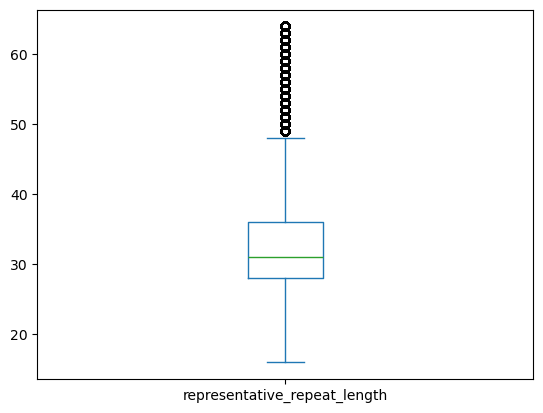

In [8]:
df.drop_duplicates(subset=['crispr_id', 'representative_repeat_seq'])['representative_repeat_length'].plot(kind='box')

<Axes: >

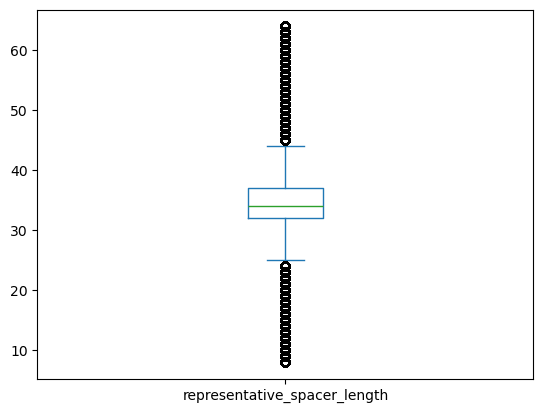

In [9]:
df.drop_duplicates(subset=['crispr_id', 'representative_repeat_seq'])['representative_spacer_length'].plot(kind='box')

# 对Cas蛋白进行聚类

```shell

# @ seq_mining/clustering
# mkdir id-0.5_cov-0.7
# mkdir id-0.9_cov-0.8
# 1. 将 fasta 文件转换为 mmseq2 database 文件 (DB)
mmseqs createdb all_raw_cas13_candidates.faa.gz DB
# 2. cluster -> DB_clu，在这一步设置 coverage 计算模式，min coverage 和 min-seq-id
# [宽松模式，进化树分析]
mmseqs cluster DB id-0.5_cov-0.7/DB_clu tmp -c 0.7 --min-seq-id 0.5 --threads 8
# [严格模式，cluster内部去重]
mmseqs cluster DB id-0.9_cov-0.8/DB_clu tmp -c 0.8 --min-seq-id 0.9 --threads 8

# 3. 提取 cluster 信息至 DB_clu.tsv
mmseqs createtsv DB DB id-0.5_cov-0.7/DB_clu id-0.5_cov-0.7.tsv
mmseqs createtsv DB DB id-0.9_cov-0.8/DB_clu id-0.9_cov-0.8.tsv

# 4. 提取每个 cluster 的代表序列
mmseqs createseqfiledb DB id-0.5_cov-0.7/DB_clu id-0.5_cov-0.7/DB_clu_seq
mmseqs createseqfiledb DB id-0.9_cov-0.8/DB_clu id-0.9_cov-0.8/DB_clu_seq
mmseqs result2flat DB DB id-0.5_cov-0.7/DB_clu_seq id-0.5_cov-0.7.fasta
mmseqs result2flat DB DB id-0.9_cov-0.8/DB_clu_seq id-0.9_cov-0.8.fasta

# ╰─○ tree . -L 1
# .
# ├── 2024-03-01_raw_cas13_candidates.faa.gz -> ../2024-03-01_raw_cas13_candidates.faa.gz
# ├── DB
# ├── DB.dbtype
# ├── DB_h
# ├── DB_h.dbtype
# ├── DB_h.index
# ├── DB.index
# ├── DB.lookup
# ├── DB.source
# ├── id-0.5_cov-0.7
# ├── id-0.5_cov-0.7.fasta
# ├── id-0.5_cov-0.7.tsv
# ├── id-0.9_cov-0.8
# ├── id-0.9_cov-0.8.fasta
# └── id-0.9_cov-0.8.tsv
# 
# 2 directories, 13 files
```

## 聚合聚类结果和序列信息

In [10]:
import os
import gzip
import subprocess
import datetime
import time
from glob import glob
from multiprocessing.pool import ThreadPool as Pool

import pandas as pd
import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
from tqdm.notebook import tqdm
from bioat.lib.libpandas import set_option
from bioat.lib.libpath import HOME
from bioat.version import __version__ as v


set_option(log_level='INFO')
print(f'bioat version = {v}')

2024-03-08 23:51:59 - [    bioat.lib.libpandas.set_option] -   libpandas.py[line:   13] -     INFO: set pandas: max_colwidth=40
2024-03-08 23:51:59 - [    bioat.lib.libpandas.set_option] -   libpandas.py[line:   15] -     INFO: set pandas: display.width=120
2024-03-08 23:51:59 - [    bioat.lib.libpandas.set_option] -   libpandas.py[line:   17] -     INFO: set pandas: display.max_columns=None
2024-03-08 23:51:59 - [    bioat.lib.libpandas.set_option] -   libpandas.py[line:   19] -     INFO: set pandas: display.max_rows=50


bioat version = 0.10.8


### df_clu

In [11]:
df_clu = pd.read_csv('../seq_mining/clustering/id-0.5_cov-0.7.tsv', sep='\t', names=['rep', 'member'], header=None)
df_clu

,rep,member
0,mG.blast.nt_163.fna.gz_LR862147.1_9597,mG.blast.nt_163.fna.gz_LR862147.1_9597
1,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_163.fna.gz_CP059603.1_2212
2,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.ref_prok_rep_genomes_95.fna...
3,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_48.fna.gz_CP059603....
4,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_559.fna.gz_AP017973...
...,...,...
1084265,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...
1084266,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...
1084267,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...
1084268,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_150.fn...


In [12]:
with gzip.open(f'../seq_mining/all_raw_cas13_candidates.faa.gz', 'rt') as f:
    faa_candidates = SeqIO.parse(f, 'fasta')
    df_faa = {}

    for cas in faa_candidates:
        df_faa[cas.id] = cas  # fasta obj
print(str(df_faa)[:1000])

{'mG.JGI.100975_00.fna.gz_Ga0114922_10000010_113': SeqRecord(seq=Seq('MNLCIIGAGHVGLVTAAVFADLGNEVICLDVDQDRVEALRGGRLPFFEPGLQEL...TN*'), id='mG.JGI.100975_00.fna.gz_Ga0114922_10000010_113', name='mG.JGI.100975_00.fna.gz_Ga0114922_10000010_113', description='mG.JGI.100975_00.fna.gz_Ga0114922_10000010_113 assembly_id@mG.JGI.100975_00.fna.gz;contig_id@Ga0114922_10000010;CDS_id@mG.JGI.100975_00.fna.gz_Ga0114922_10000010_113;CDS_start@125813;CDS_end@127117;CDS_predict_score@159.5;CDS_strand@-;CDS_phase@0;Predigal_info@ID=113|partial=00|start_type=ATG|rbs_motif=GGAG/GAGG|rbs_spacer=5-10bp|gc_cont=0.650|conf=100.00|score=159.54|cscore=152.67|sscore=6.88|rscore=6.32|uscore=-2.38|tscore=3.58;crispr_id@mG.JGI.100975_00.fna.gz+Ga0114922_10000010+1;crispr_start@141808;crispr_end@142371;crispr_extend_start@121808;crispr_extend_end@162371;repeat_seq@ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT;n_copies@9;n_repeats@36;n_spacers@29;overlapped_base_count@1304 ID=10_113;partial=00;start_type=ATG;rbs_motif=GGAG/GAG

### df_clu (add SeqRecord obj)

In [13]:
df_clu['SeqRecord:rep'] = df_clu['rep'].map(df_faa)  # SeqRecord
df_clu['SeqRecord:member'] = df_clu['member'].map(df_faa)  # SeqRecord
df_clu

,rep,member,SeqRecord:rep,SeqRecord:member
0,mG.blast.nt_163.fna.gz_LR862147.1_9597,mG.blast.nt_163.fna.gz_LR862147.1_9597,"(M, A, D, V, V, A, S, G, V, L, S, S,...","(M, A, D, V, V, A, S, G, V, L, S, S,..."
1,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_163.fna.gz_CP059603.1_2212,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,..."
2,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.ref_prok_rep_genomes_95.fna...,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,..."
3,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_48.fna.gz_CP059603....,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,..."
4,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_559.fna.gz_AP017973...,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, T, A, R, A, H, T, N, I, A,..."
...,...,...,...,...
1084265,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, G, E, D, R, V, L, G, V, D, R, R,...","(M, G, E, D, R, V, L, G, V, D, R, R,..."
1084266,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, H, R, P, A, L, E, L, L, G, E, A,...","(M, H, R, P, A, L, E, L, L, G, E, A,..."
1084267,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, S, S, Q, Y, P, E, S, I, Q, T, I,...","(M, S, S, Q, Y, P, E, S, I, Q, T, I,..."
1084268,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_150.fn...,"(M, S, S, Q, Y, P, E, S, I, Q, T, I,...","(M, N, T, K, D, S, Q, P, L, S, W, E,..."


In [14]:
df_clu['SeqRecord:rep'][0]

SeqRecord(seq=Seq('MADVVASGVLSSLVDRLRERITGEFGPVMDVGAELKKLEGTLSTICDVLEDAEG...GS*'), id='mG.blast.nt_163.fna.gz_LR862147.1_9597', name='mG.blast.nt_163.fna.gz_LR862147.1_9597', description='mG.blast.nt_163.fna.gz_LR862147.1_9597 assembly_id@mG.blast.nt_163.fna.gz;contig_id@LR862147.1;CDS_id@mG.blast.nt_163.fna.gz_LR862147.1_9597;CDS_start@10545777;CDS_end@10546967;CDS_predict_score@84.1;CDS_strand@+;CDS_phase@0;Predigal_info@ID=9597|partial=00|start_type=ATG|rbs_motif=None|rbs_spacer=None|gc_cont=0.460|conf=100.00|score=84.13|cscore=88.20|sscore=-4.07|rscore=0.00|uscore=-4.60|tscore=0.53;crispr_id@mG.blast.nt_163.fna.gz+LR862147.1+4;crispr_start@10553263;crispr_end@10553435;crispr_extend_start@10533263;crispr_extend_end@10573435;repeat_seq@GGCCCGGCCCGGCACGGCCC;n_copies@3;n_repeats@20;n_spacers@55;overlapped_base_count@1190 ID=1_9597;partial=00;start_type=ATG;rbs_motif=None;rbs_spacer=None;gc_cont=0.460;HEPN-1@[span=(219, 225),target=RQISDH];HEPN-count@1', dbxrefs=[])

In [15]:
def get_crispr_id(x):
    v_rep = v_member = 'unset'
    if x['rep'].startswith('known'):
        v_rep = pd.NA
    if x['member'].startswith('known'):
        v_member = pd.NA
    if v_rep is not pd.NA:
        k, v = x['SeqRecord:rep'].description.split(';')[9].split('@')
        if k == 'crispr_id':
            v_rep = v
        else:
            raise ValueError
    if v_member is not pd.NA:
        k, v = x['SeqRecord:member'].description.split(';')[9].split('@')
        if k == 'crispr_id':
            v_member = v
        else:
            raise ValueError
    return [v_rep, v_member]
df_clu[['crispr_id:rep', 'crispr_id:member']] = df_clu.apply(get_crispr_id, axis=1, result_type='expand')
df_clu

,rep,member,SeqRecord:rep,SeqRecord:member,crispr_id:rep,crispr_id:member
0,mG.blast.nt_163.fna.gz_LR862147.1_9597,mG.blast.nt_163.fna.gz_LR862147.1_9597,"(M, A, D, V, V, A, S, G, V, L, S, S,...","(M, A, D, V, V, A, S, G, V, L, S, S,...",mG.blast.nt_163.fna.gz+LR862147.1+4,mG.blast.nt_163.fna.gz+LR862147.1+4
1,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_163.fna.gz_CP059603.1_2212,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_163.fna.gz+CP059603.1+53
2,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.ref_prok_rep_genomes_95.fna...,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.ref_prok_rep_genomes_95.fna...
3,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_48.fna.gz_CP059603....,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_prok_48.fna.gz+CP059603.1+5
4,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_559.fna.gz_AP017973...,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, T, A, R, A, H, T, N, I, A,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_prok_559.fna.gz+AP017973...
...,...,...,...,...,...,...
1084265,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, G, E, D, R, V, L, G, V, D, R, R,...","(M, G, E, D, R, V, L, G, V, D, R, R,...",mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...
1084266,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, H, R, P, A, L, E, L, L, G, E, A,...","(M, H, R, P, A, L, E, L, L, G, E, A,...",mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...
1084267,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, S, S, Q, Y, P, E, S, I, Q, T, I,...","(M, S, S, Q, Y, P, E, S, I, Q, T, I,...",mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...
1084268,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_150.fn...,"(M, S, S, Q, Y, P, E, S, I, Q, T, I,...","(M, N, T, K, D, S, Q, P, L, S, W, E,...",mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_150.fn...


In [16]:
df_clu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084270 entries, 0 to 1084269
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   rep               1084270 non-null  object
 1   member            1084270 non-null  object
 2   SeqRecord:rep     1084270 non-null  object
 3   SeqRecord:member  1084270 non-null  object
 4   crispr_id:rep     1084084 non-null  object
 5   crispr_id:member  1084064 non-null  object
dtypes: object(6)
memory usage: 49.6+ MB


In [17]:
df_clu.isnull().sum()

rep                   0
member                0
SeqRecord:rep         0
SeqRecord:member      0
crispr_id:rep       186
crispr_id:member    206
dtype: int64

In [18]:
# 这些无法匹配信息的应该都是后加的known cas
df_clu[df_clu['crispr_id:rep'].isnull()]

,rep,member,SeqRecord:rep,SeqRecord:member,crispr_id:rep,crispr_id:member
1598,known_Cas13c5_FpeCas13c_WP_027128616.1,known_Cas13c5_FpeCas13c_WP_027128616.1,"(M, G, K, P, N, R, S, S, I, I, K, I,...","(M, G, K, P, N, R, S, S, I, I, K, I,...",NaN,<NA>
1599,known_Cas13c5_FpeCas13c_WP_027128616.1,mG.blast.ref_prok_rep_genomes_276.fn...,"(M, G, K, P, N, R, S, S, I, I, K, I,...","(M, G, K, P, N, R, S, S, I, I, K, I,...",NaN,mG.blast.ref_prok_rep_genomes_276.fn...
1600,known_Cas13f2_NCBI-GenBank_NMA74937....,known_Cas13f2_NCBI-GenBank_NMA74937....,"(M, K, Q, K, L, D, F, I, F, K, N, K,...","(M, K, Q, K, L, D, F, I, F, K, N, K,...",NaN,<NA>
1601,known_Cas13i22_JGI_Alteio_BWMinHeat_...,known_Cas13i22_JGI_Alteio_BWMinHeat_...,"(M, Y, N, K, P, N, G, S, P, E, P, F,...","(M, Y, N, K, P, N, G, S, P, E, P, F,...",NaN,<NA>
1602,known_Cas13i22_JGI_Alteio_BWMinHeat_...,mG.JGI.153511.fna.gz_Ga0207159_1065_14,"(M, Y, N, K, P, N, G, S, P, E, P, F,...","(M, Y, N, K, P, N, G, S, P, E, P, F,...",NaN,mG.JGI.153511.fna.gz+Ga0207159_1065+1
...,...,...,...,...,...,...
1033068,known_Cas13h1_JGI_NGESurdeep092012_2...,mG.JGI.184478.fna.gz_Ga0207931_10038...,"(M, D, T, P, S, K, E, S, S, G, K, I,...","(M, D, T, P, S, K, E, S, S, G, K, I,...",NaN,mG.JGI.184478.fna.gz+Ga0207931_10038...
1033069,known_Cas13h1_JGI_NGESurdeep092012_2...,known_Cas13h2_JGI_IMG_3300005259_628...,"(M, D, T, P, S, K, E, S, S, G, K, I,...","(M, D, T, N, N, K, E, S, S, E, K, I,...",NaN,<NA>
1033070,known_Cas13i25_JGI_Ga0247048_LiWei20...,known_Cas13i25_JGI_Ga0247048_LiWei20...,"(M, Q, I, E, R, T, D, V, Y, D, S, Y,...","(M, Q, I, E, R, T, D, V, Y, D, S, Y,...",NaN,<NA>
1040691,known_Cas13g2_NCBI-GenBank_MBO530639...,known_Cas13g2_NCBI-GenBank_MBO530639...,"(M, N, P, A, K, G, N, Q, Q, D, A, P,...","(M, N, P, A, K, G, N, Q, Q, D, A, P,...",NaN,<NA>


In [19]:
df_clu[df_clu['crispr_id:member'].isnull()]

,rep,member,SeqRecord:rep,SeqRecord:member,crispr_id:rep,crispr_id:member
1598,known_Cas13c5_FpeCas13c_WP_027128616.1,known_Cas13c5_FpeCas13c_WP_027128616.1,"(M, G, K, P, N, R, S, S, I, I, K, I,...","(M, G, K, P, N, R, S, S, I, I, K, I,...",<NA>,NaN
1600,known_Cas13f2_NCBI-GenBank_NMA74937....,known_Cas13f2_NCBI-GenBank_NMA74937....,"(M, K, Q, K, L, D, F, I, F, K, N, K,...","(M, K, Q, K, L, D, F, I, F, K, N, K,...",<NA>,NaN
1601,known_Cas13i22_JGI_Alteio_BWMinHeat_...,known_Cas13i22_JGI_Alteio_BWMinHeat_...,"(M, Y, N, K, P, N, G, S, P, E, P, F,...","(M, Y, N, K, P, N, G, S, P, E, P, F,...",<NA>,NaN
6697,mG.blast.nt_86.fna.gz_CP001312.1_2042,known_Cas13a13_RcsCas13a_WP_013067728.1,"(M, P, L, Q, A, A, G, F, G, K, P, R,...","(M, Q, I, G, K, V, Q, G, R, T, I, S,...",mG.blast.nt_86.fna.gz+CP001312.1+7,NaN
6698,mG.blast.nt_86.fna.gz_CP001312.1_2042,known_Cas13a14_RcrCas13a_WP_023911507.1,"(M, P, L, Q, A, A, G, F, G, K, P, R,...","(M, Q, I, G, K, V, Q, G, R, T, I, S,...",mG.blast.nt_86.fna.gz+CP001312.1+7,NaN
...,...,...,...,...,...,...
1033067,known_Cas13h1_JGI_NGESurdeep092012_2...,known_Cas13h1_JGI_NGESurdeep092012_2...,"(M, D, T, P, S, K, E, S, S, G, K, I,...","(M, D, T, P, S, K, E, S, S, G, K, I,...",NaN,NaN
1033069,known_Cas13h1_JGI_NGESurdeep092012_2...,known_Cas13h2_JGI_IMG_3300005259_628...,"(M, D, T, P, S, K, E, S, S, G, K, I,...","(M, D, T, N, N, K, E, S, S, E, K, I,...",NaN,NaN
1033070,known_Cas13i25_JGI_Ga0247048_LiWei20...,known_Cas13i25_JGI_Ga0247048_LiWei20...,"(M, Q, I, E, R, T, D, V, Y, D, S, Y,...","(M, Q, I, E, R, T, D, V, Y, D, S, Y,...",NaN,NaN
1040691,known_Cas13g2_NCBI-GenBank_MBO530639...,known_Cas13g2_NCBI-GenBank_MBO530639...,"(M, N, P, A, K, G, N, Q, Q, D, A, P,...","(M, N, P, A, K, G, N, Q, Q, D, A, P,...",NaN,NaN


### df_clu (add crispr info - only first line)

In [20]:
df_cri = pd.read_pickle('../seq_mining/all_raw_crispr_info.pkl.gz')
df_cri.reset_index(drop=True, inplace=True)
df_cri

,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank
0,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGTCGCCGCCGATGGTCACCGCGTCATAGT,29,30.0,141808,100.0,GATGCTGGCA
1,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,ACATCATCCACCTGGTGATAGCGCGCTTC,29,29.0,141874,100.0,GCGTCATAGT
2,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGACACCGAGAGGGAGCTGACCTTCAA,29,30.0,141939,100.0,AGCGCGCTTC
3,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGCCGAGGCGAACCGCGTGTCTGATG,29,29.0,142005,100.0,TGACCTTCAA
4,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGCGCAGTCGCCGCGGGTTGCGCGTGCGGG,29,30.0,142070,100.0,GTGTCTGATG
...,...,...,...,...,...,...,...,...,...,...,...
5813404,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,CTGCTCGATGCGATCGGCCGCGGCGGCCGATCGGC,35,35.0,3151,100.0,CACCGTGTAG
5813405,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GATGACCTCGCCAATCATCCGTTCGCTGTCAACCTA,35,36.0,3223,100.0,GCCGATCGGC
5813406,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GCGCCTGGCTGCGTTCACCATGGCGCGGCCTTC,35,33.0,3296,100.0,TGTCAACCTA
5813407,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,TTGATGAATTCGCCCACGTTCGCTCTCGATCCGTC,35,35.0,3366,100.0,CGCGGCCTTC


In [21]:
df_cri.isnull().sum()

crispr_id                            0
representative_repeat_seq            0
repeat_mismatch                      1
representative_repeat_length         0
repeat_length                        0
spacer_seq                       13037
representative_spacer_length         0
spacer_length                   320762
position                             0
%identity                            0
left_flank                           0
dtype: int64

In [22]:
# repeat_mismatch和spacer_seq的缺失值应该是bioat的bug
# TODO # 以后再解决，目前没有影响(先排除)
df_cri[df_cri['repeat_mismatch'].isnull()]

,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank
3678612,mG.blast.nt_2296.fna.gz+OX381590.1+6,TCACTTGATGGTTGATACTCCAAATTGTGAACCCAG...,NaN,61,61,NaN,16,0,19687501,100.0,.......................................


In [23]:
# 先进行数据筛选：排除最后一个spacer
# 法1 
# 去除每个key的最后一行  
# df_grouped = df.groupby('key', as_index=False)  
# df_without_last_rows = pd.concat([group.iloc[:-1] for _, group in df_grouped])  
# 法2，注意到这一行spacer_length必定为NaN
# 一步排除所有NA信息，包括解析问题
df_cri = df_cri.loc[df_cri.isnull().sum(axis=1) == 0].copy()

# 尝试进行类型转换
for col in df_cri.columns:  
    try:  
        # 尝试将列转换为整数类型  
        df_cri[col] = df_cri[col].astype(int)  
    except ValueError:  
        # 如果转换失败（例如，列中包含非整数数据），则打印提示并跳过该列  
        print(f"Column '{col}' cannot be converted to integer type. Skipping.")  
  
# 显示处理后的DataFrame  
df_cri
# Column 'crispr_id' cannot be converted to integer type. Skipping.
# Column 'representative_repeat_seq' cannot be converted to integer type. Skipping.
# Column 'repeat_mismatch' cannot be converted to integer type. Skipping.
# Column 'spacer_seq' cannot be converted to integer type. Skipping.
# Column 'left_flank' cannot be converted to integer type. Skipping.

Column 'crispr_id' cannot be converted to integer type. Skipping.
Column 'representative_repeat_seq' cannot be converted to integer type. Skipping.
Column 'repeat_mismatch' cannot be converted to integer type. Skipping.
Column 'spacer_seq' cannot be converted to integer type. Skipping.
Column 'left_flank' cannot be converted to integer type. Skipping.


,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank
0,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGTCGCCGCCGATGGTCACCGCGTCATAGT,29,30,141808,100,GATGCTGGCA
1,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,ACATCATCCACCTGGTGATAGCGCGCTTC,29,29,141874,100,GCGTCATAGT
2,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGACACCGAGAGGGAGCTGACCTTCAA,29,30,141939,100,AGCGCGCTTC
3,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGCCGAGGCGAACCGCGTGTCTGATG,29,29,142005,100,TGACCTTCAA
4,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGCGCAGTCGCCGCGGGTTGCGCGTGCGGG,29,30,142070,100,GTGTCTGATG
...,...,...,...,...,...,...,...,...,...,...,...
5813403,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,CTGAAGAAAGCGTATTGGTAAACGTCACCGTGTAG,35,35,3079,100,GCTTGGTATA
5813404,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,CTGCTCGATGCGATCGGCCGCGGCGGCCGATCGGC,35,35,3151,100,CACCGTGTAG
5813405,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GATGACCTCGCCAATCATCCGTTCGCTGTCAACCTA,35,36,3223,100,GCCGATCGGC
5813406,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GCGCCTGGCTGCGTTCACCATGGCGCGGCCTTC,35,33,3296,100,TGTCAACCTA


In [24]:
df_cri.dtypes

crispr_id                       object
representative_repeat_seq       object
repeat_mismatch                 object
representative_repeat_length     int64
repeat_length                    int64
spacer_seq                      object
representative_spacer_length     int64
spacer_length                    int64
position                         int64
%identity                        int64
left_flank                      object
dtype: object

In [25]:
df_cri.isnull().sum()

crispr_id                       0
representative_repeat_seq       0
repeat_mismatch                 0
representative_repeat_length    0
repeat_length                   0
spacer_seq                      0
representative_spacer_length    0
spacer_length                   0
position                        0
%identity                       0
left_flank                      0
dtype: int64

In [26]:
df_cri.shape

(5486499, 11)

In [27]:
# crispr length的稳定性、spacer length的稳定性（排除最后一个spacer，已经在数据筛选中排除）
# spacer的波动情况
df_cri['spacer_length:std'] = df_cri.groupby('crispr_id')['spacer_length'].transform('std')
df_cri

,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank,spacer_length:std
0,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGTCGCCGCCGATGGTCACCGCGTCATAGT,29,30,141808,100,GATGCTGGCA,0.462910
1,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,ACATCATCCACCTGGTGATAGCGCGCTTC,29,29,141874,100,GCGTCATAGT,0.462910
2,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGACACCGAGAGGGAGCTGACCTTCAA,29,30,141939,100,AGCGCGCTTC,0.462910
3,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGCCGAGGCGAACCGCGTGTCTGATG,29,29,142005,100,TGACCTTCAA,0.462910
4,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGCGCAGTCGCCGCGGGTTGCGCGTGCGGG,29,30,142070,100,GTGTCTGATG,0.462910
...,...,...,...,...,...,...,...,...,...,...,...,...
5813403,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,CTGAAGAAAGCGTATTGGTAAACGTCACCGTGTAG,35,35,3079,100,GCTTGGTATA,0.753728
5813404,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,CTGCTCGATGCGATCGGCCGCGGCGGCCGATCGGC,35,35,3151,100,CACCGTGTAG,0.753728
5813405,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GATGACCTCGCCAATCATCCGTTCGCTGTCAACCTA,35,36,3223,100,GCCGATCGGC,0.753728
5813406,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GCGCCTGGCTGCGTTCACCATGGCGCGGCCTTC,35,33,3296,100,TGTCAACCTA,0.753728


In [28]:
# 都是一些单独存在的行，也就是说第二个repeat紧接着的spacer就已经是断掉不全的了
df_cri.loc[df_cri['spacer_length:std'].isnull()]

,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank,spacer_length:std
9256,mG.JGI.102278.fna.gz+Ga0153951_10006...,AAGGATCACCCCCGTATGCACGGGGAATAC,..............................,30,30,CGACGAAAGTGGCCTACAACTCTTGGGCGCA,31,31,62,100,CTGACCTTGT,NaN
11269,mG.JGI.10381_00.fna.gz+SL_3KL_010_SE...,GTGACAATCCCCTATCAATCGGGGCAATCATTTCCACAA,.......................................,39,39,AAATTTTAGGAGGAGTTAGTGATGGAAAAAGTTTTTCAC,38,39,78,100,GAAAGAAATT,NaN
12410,mG.JGI.104637.fna.gz+Ga0136554_10011...,TAAACTTAATCGAACCACTTTTGGGATTGAAAT,.T...............................,33,33,ATAAATAATTTGTGACAATAGCAACGCAGCCGT,33,33,68,97,AAATTATTTA,NaN
12806,mG.JGI.104637.fna.gz+Ga0136554_10027...,CATCATCAGCGGATGGCCGCGGTGGTGAGCGTGTTG...,.......................................,61,61,GCGTGGAGGTGACACACCTGACACCCTATCATTTCC...,50,50,112,100,ATACGTCCAT,NaN
14057,mG.JGI.104640.fna.gz+Ga0136589_10042...,GTCTCAACACCCCTGAGGGCGGGAGGTTTCGCGAAA...,.......................................,40,40,GTGGAAAGGATGCGTTCGGTCGGATCCTTCTC,33,32,75,100,TCGTCAAGTT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5797288,mT.JGI.61109.fna.gz+Ga0066563_112490+2,TTAGTTCGCTGCCGCGCAGGCAGCTTAGAAA,AA.............................,31,31,TCTCAACGGCATCAATTGCAATTTGCCGC,29,29,61,93,CAGGCAATAA,NaN
5800987,mT.JGI.67572_00.fna.gz+Ga0075040_114...,TGCTCTCTAACCCGCATGGGGCGACTCGCCCGC,..............................---,33,33,TTGTCGCCAAACTTGCGCAGCGCGTAGGCCAGCT,32,34,64,90,CTTCTCCGAC,NaN
5801406,mT.JGI.73456.fna.gz+Ga0079064_1425723+6,AGGCTTCAATGGGGCCACCACTTTGCAGTGGTGGATACG,.......................................,39,39,AGCGCAGGAAGCGAGAGGCTGAGCGCATACGGG,33,33,74,100,GCCCGTAGAC,NaN
5801554,mT.JGI.73457.fna.gz+Ga0079066_1546506+7,TTGTTTCCATACCCTTCTGATTGCGGGTCTCATTGCAAG,.......................................,39,39,TGGCTATTGGGGAAGCAGGAATCATCGCATTCCTT,34,35,73,100,ATCGAGACAG,NaN


In [29]:
pattern = '[AGCTNagctn]'

In [30]:
# for test
df_cri[df_cri['repeat_mismatch'].str.contains(pattern)]

,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank,spacer_length:std
47,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ATTGTAACTGATCCGTGCCTGAGTGCAAGCCACAAC,.............................G......,36,36,TCATAGTCTATCTTGCCCAGACCCCAGAGG,29,30,50031,97,CCGAGGATAA,0.349908
63,mG.JGI.100975_00.fna.gz+Ga0114922_10...,GCACAATCACCAACTGCTATGCCAC,................T........,25,25,AGGCTCAGTAAGCGGTGGGAATGATTCTAAATACTA...,61,68,44019,96,GACTACGAAG,4.806246
65,mG.JGI.100975_00.fna.gz+Ga0114922_10...,GCACAATCACCAACTGCTATGCCAC,................T........,25,25,CGGAGTGGTTACCGGCGGGGATAATTCTGACCGTTT...,61,62,44199,96,TACAATTCCA,4.806246
66,mG.JGI.100975_00.fna.gz+Ga0114922_10...,GCACAATCACCAACTGCTATGCCAC,................T........,25,25,CAGCTTGGTAACCGGCGATGAGTATCTCGGCGGTCT...,61,56,44286,96,TACAATTCCA,4.806246
84,mG.JGI.100975_00.fna.gz+Ga0114922_10...,GGGGGGCAAGCTCGCGCGTATGCACGGATTGGCAG,gggggg.............................,35,35,GAGAGCCAGGGGATGACCCTCAAGAAGGTCGCg,32,33,37029,100,TTGCCATAAg,0.707107
...,...,...,...,...,...,...,...,...,...,...,...,...
5813212,mT.JGI.99761.fna.gz+Ga0138541_1077836+1,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,A....................................,37,37,TTGGCTATCACGGTTTTGCTCTCGATGCTTGGTATA,35,36,3011,97,GCCGTCAGTC,0.607875
5813237,mT.JGI.99781.fna.gz+Ga0138573_1065505+1,GCTTCAATGGGGCCACGGCGATGAAGCCGTGGAAGAG,....................................T,37,37,GACTGACGGCGAACCTGACTGTTGGTGGACTCAATC,35,36,2048,97,TGATAGCCAA,0.902169
5813318,mT.JGI.99781.fna.gz+Ga0138573_1252613+2,CTCGCGAGCCTCATCGCCCGCACCGAGGGCATTGAAAC,.............................T........,38,38,TATCGCATGGTTGTTGCCGGAAGTAGAGGTGGAGGT,36,36,3298,97,AGATTGACCT,1.487388
5813321,mT.JGI.99781.fna.gz+Ga0138573_1252613+2,CTCGCGAGCCTCATCGCCCGCACCGAGGGCATTGAAAC,...A..................................,38,38,CCGGCCTGCGAGTACCTGACGACCGATGCCGGGTT,36,35,3522,97,GTCGACCCAG,1.487388


In [31]:
# repeat mismatch, std的多少
df_cri['repeat_mismatch_count'] = df_cri['repeat_mismatch'].str.count(pattern)
df_cri['repeat_mismatch_count:mean'] = df_cri.groupby('crispr_id')['repeat_mismatch_count'].transform('mean')
df_cri['repeat_mismatch_count:std'] = df_cri.groupby('crispr_id')['repeat_mismatch_count'].transform('std')
df_cri

,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank,spacer_length:std,repeat_mismatch_count,repeat_mismatch_count:mean,repeat_mismatch_count:std
0,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGTCGCCGCCGATGGTCACCGCGTCATAGT,29,30,141808,100,GATGCTGGCA,0.462910,0,0.000000,0.000000
1,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,ACATCATCCACCTGGTGATAGCGCGCTTC,29,29,141874,100,GCGTCATAGT,0.462910,0,0.000000,0.000000
2,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGACACCGAGAGGGAGCTGACCTTCAA,29,30,141939,100,AGCGCGCTTC,0.462910,0,0.000000,0.000000
3,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GCAGGCCGAGGCGAACCGCGTGTCTGATG,29,29,142005,100,TGACCTTCAA,0.462910,0,0.000000,0.000000
4,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGCGCAGTCGCCGCGGGTTGCGCGTGCGGG,29,30,142070,100,GTGTCTGATG,0.462910,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813403,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,CTGAAGAAAGCGTATTGGTAAACGTCACCGTGTAG,35,35,3079,100,GCTTGGTATA,0.753728,0,0.023256,0.152499
5813404,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,CTGCTCGATGCGATCGGCCGCGGCGGCCGATCGGC,35,35,3151,100,CACCGTGTAG,0.753728,0,0.023256,0.152499
5813405,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GATGACCTCGCCAATCATCCGTTCGCTGTCAACCTA,35,36,3223,100,GCCGATCGGC,0.753728,0,0.023256,0.152499
5813406,mT.JGI.99783.fna.gz+Ga0138576_1258072+2,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,GCGCCTGGCTGCGTTCACCATGGCGCGGCCTTC,35,33,3296,100,TGTCAACCTA,0.753728,0,0.023256,0.152499


In [32]:
df_cri.loc[df_cri['repeat_mismatch_count:mean'].isnull()]

,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank,spacer_length:std,repeat_mismatch_count,repeat_mismatch_count:mean,repeat_mismatch_count:std


In [33]:
# 同上
df_cri.loc[df_cri['repeat_mismatch_count:std'].isnull()]

,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank,spacer_length:std,repeat_mismatch_count,repeat_mismatch_count:mean,repeat_mismatch_count:std
9256,mG.JGI.102278.fna.gz+Ga0153951_10006...,AAGGATCACCCCCGTATGCACGGGGAATAC,..............................,30,30,CGACGAAAGTGGCCTACAACTCTTGGGCGCA,31,31,62,100,CTGACCTTGT,NaN,0,0.0,NaN
11269,mG.JGI.10381_00.fna.gz+SL_3KL_010_SE...,GTGACAATCCCCTATCAATCGGGGCAATCATTTCCACAA,.......................................,39,39,AAATTTTAGGAGGAGTTAGTGATGGAAAAAGTTTTTCAC,38,39,78,100,GAAAGAAATT,NaN,0,0.0,NaN
12410,mG.JGI.104637.fna.gz+Ga0136554_10011...,TAAACTTAATCGAACCACTTTTGGGATTGAAAT,.T...............................,33,33,ATAAATAATTTGTGACAATAGCAACGCAGCCGT,33,33,68,97,AAATTATTTA,NaN,1,1.0,NaN
12806,mG.JGI.104637.fna.gz+Ga0136554_10027...,CATCATCAGCGGATGGCCGCGGTGGTGAGCGTGTTG...,.......................................,61,61,GCGTGGAGGTGACACACCTGACACCCTATCATTTCC...,50,50,112,100,ATACGTCCAT,NaN,0,0.0,NaN
14057,mG.JGI.104640.fna.gz+Ga0136589_10042...,GTCTCAACACCCCTGAGGGCGGGAGGTTTCGCGAAA...,.......................................,40,40,GTGGAAAGGATGCGTTCGGTCGGATCCTTCTC,33,32,75,100,TCGTCAAGTT,NaN,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797288,mT.JGI.61109.fna.gz+Ga0066563_112490+2,TTAGTTCGCTGCCGCGCAGGCAGCTTAGAAA,AA.............................,31,31,TCTCAACGGCATCAATTGCAATTTGCCGC,29,29,61,93,CAGGCAATAA,NaN,2,2.0,NaN
5800987,mT.JGI.67572_00.fna.gz+Ga0075040_114...,TGCTCTCTAACCCGCATGGGGCGACTCGCCCGC,..............................---,33,33,TTGTCGCCAAACTTGCGCAGCGCGTAGGCCAGCT,32,34,64,90,CTTCTCCGAC,NaN,0,0.0,NaN
5801406,mT.JGI.73456.fna.gz+Ga0079064_1425723+6,AGGCTTCAATGGGGCCACCACTTTGCAGTGGTGGATACG,.......................................,39,39,AGCGCAGGAAGCGAGAGGCTGAGCGCATACGGG,33,33,74,100,GCCCGTAGAC,NaN,0,0.0,NaN
5801554,mT.JGI.73457.fna.gz+Ga0079066_1546506+7,TTGTTTCCATACCCTTCTGATTGCGGGTCTCATTGCAAG,.......................................,39,39,TGGCTATTGGGGAAGCAGGAATCATCGCATTCCTT,34,35,73,100,ATCGAGACAG,NaN,0,0.0,NaN


In [34]:
# TODO spacer信息的blast hit可以考虑最后再加（去重后，用字典，做匹配）

In [35]:
# select first line of crispr array
df_cri.drop_duplicates(subset=['crispr_id'], keep='first', inplace=True)
df_cri

,crispr_id,representative_repeat_seq,repeat_mismatch,representative_repeat_length,repeat_length,spacer_seq,representative_spacer_length,spacer_length,position,%identity,left_flank,spacer_length:std,repeat_mismatch_count,repeat_mismatch_count:mean,repeat_mismatch_count:std
0,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGTCGCCGCCGATGGTCACCGCGTCATAGT,29,30,141808,100,GATGCTGGCA,0.462910,0,0.000000,0.000000
9,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ATTGTAACTGATCCGTGCCTGAGTGCAAGCCACAAC,....................................,36,36,CCCGCCAGGCTTGCATCTCCTGCTGGATGC,29,30,47526,100,CAGGCTAAGT,0.349908,0,0.025000,0.158114
50,mG.JGI.100975_00.fna.gz+Ga0114922_10...,GTTGCAATGAGAATGGTTGCAGAGTAAGGATTGAAAC,.....................................,37,37,CCTTTTGTGAAATTCAATCATCTTGACACACTTTTGT,35,37,57777,100,AATGCATGCA,1.269296,0,0.000000,0.000000
61,mG.JGI.100975_00.fna.gz+Ga0114922_10...,GCACAATCACCAACTGCTATGCCAC,.........................,25,25,AGGCTCAATAACCGGCTATGTCTATCTCGGTGGCCT...,61,56,43848,100,GACGACGAAG,4.806246,0,0.500000,0.547723
68,mG.JGI.100975_00.fna.gz+Ga0114922_10...,CTAACAAATTATAACTAGACTCAACTTAGTTTGAAAC,.....................................,37,37,AAAAGAGTTTTTTCCATATTCCCTTTATAATCTTT,34,35,27607,100,AAAATTTGCT,0.717741,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813217,mT.JGI.99781.fna.gz+Ga0138573_1065505+1,GCTTCAATGGGGCCACGGCGATGAAGCCGTGGAAGAG,.....................................,37,37,TCTCAATTTTGAAAGGATAAATAATCATGGAATCT,35,35,596,100,CCCCACCCCC,0.902169,0,0.017544,0.132453
5813275,mT.JGI.99781.fna.gz+Ga0138573_1252613+2,CTCGCGAGCCTCATCGCCCGCACCGAGGGCATTGAAAC,......................................,38,38,CAAGCTTCCGTGTCCCGCTGGATAAAGGCGCAGTCCG,36,37,78,100,GGAGTGGAGG,1.487388,0,0.041667,0.201941
5813324,mT.JGI.99782.fna.gz+Ga0138575_1030779+1,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,TTCAATCTCCGAACCGAGTCGGCCTGGCGGCTTCAC,35,36,309,100,GGGGCGGGCC,0.673772,0,0.000000,0.000000
5813361,mT.JGI.99783.fna.gz+Ga0138576_1031247+1,GTTTCAATCCTTGTTCTTGTGGATGACGGTCGTCGACG,......................................,38,38,CGGGTACGATTCCGTCGATGTTCAGGCCACATTCGG,36,36,1762,100,CAGTGACGTG,0.577350,0,0.000000,0.000000


In [37]:
df_cri.info()
df_cri.describe()

# 431 null

<class 'pandas.core.frame.DataFrame'>
Index: 323740 entries, 0 to 5813365
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   crispr_id                     323740 non-null  object 
 1   representative_repeat_seq     323740 non-null  object 
 2   repeat_mismatch               323740 non-null  object 
 3   representative_repeat_length  323740 non-null  int64  
 4   repeat_length                 323740 non-null  int64  
 5   spacer_seq                    323740 non-null  object 
 6   representative_spacer_length  323740 non-null  int64  
 7   spacer_length                 323740 non-null  int64  
 8   position                      323740 non-null  int64  
 9   %identity                     323740 non-null  int64  
 10  left_flank                    323740 non-null  object 
 11  spacer_length:std             323309 non-null  float64
 12  repeat_mismatch_count         323740 non-null  i

,representative_repeat_length,repeat_length,representative_spacer_length,spacer_length,position,%identity,spacer_length:std,repeat_mismatch_count,repeat_mismatch_count:mean,repeat_mismatch_count:std
count,323740.000000,323740.000000,323740.000000,323740.000000,3.237400e+05,323740.000000,323309.000000,323740.000000,323740.000000,323309.000000
mean,32.639121,32.639121,35.860033,36.107540,1.515233e+06,98.290582,2.463478,0.438095,0.377233,0.340140
std,8.303187,8.303187,7.788224,8.116446,3.495585e+06,3.507208,10.890686,1.470952,1.299619,0.625677
min,16.000000,16.000000,8.000000,1.000000,2.000000e+00,14.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,28.000000,32.000000,32.000000,2.164000e+03,97.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,31.000000,34.000000,35.000000,3.199650e+04,100.000000,0.886405,0.000000,0.021898,0.000000
75%,36.000000,36.000000,37.000000,38.000000,1.546434e+06,100.000000,1.732051,0.000000,0.435897,0.577350
max,64.000000,64.000000,64.000000,110.000000,3.175904e+07,100.000000,392.833664,64.000000,64.000000,26.162951


In [38]:
# rename for merge
df_cri.columns = [f'crispr_info=member:{i}' for i in df_cri.columns]
df_cri

,crispr_info=member:crispr_id,crispr_info=member:representative_repeat_seq,crispr_info=member:repeat_mismatch,crispr_info=member:representative_repeat_length,crispr_info=member:repeat_length,crispr_info=member:spacer_seq,crispr_info=member:representative_spacer_length,crispr_info=member:spacer_length,crispr_info=member:position,crispr_info=member:%identity,crispr_info=member:left_flank,crispr_info=member:spacer_length:std,crispr_info=member:repeat_mismatch_count,crispr_info=member:repeat_mismatch_count:mean,crispr_info=member:repeat_mismatch_count:std
0,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ACTGTAGTTGGTCGGGAATCGTCGCTCTGGTACAAT,....................................,36,36,GGTCGCCGCCGATGGTCACCGCGTCATAGT,29,30,141808,100,GATGCTGGCA,0.462910,0,0.000000,0.000000
9,mG.JGI.100975_00.fna.gz+Ga0114922_10...,ATTGTAACTGATCCGTGCCTGAGTGCAAGCCACAAC,....................................,36,36,CCCGCCAGGCTTGCATCTCCTGCTGGATGC,29,30,47526,100,CAGGCTAAGT,0.349908,0,0.025000,0.158114
50,mG.JGI.100975_00.fna.gz+Ga0114922_10...,GTTGCAATGAGAATGGTTGCAGAGTAAGGATTGAAAC,.....................................,37,37,CCTTTTGTGAAATTCAATCATCTTGACACACTTTTGT,35,37,57777,100,AATGCATGCA,1.269296,0,0.000000,0.000000
61,mG.JGI.100975_00.fna.gz+Ga0114922_10...,GCACAATCACCAACTGCTATGCCAC,.........................,25,25,AGGCTCAATAACCGGCTATGTCTATCTCGGTGGCCT...,61,56,43848,100,GACGACGAAG,4.806246,0,0.500000,0.547723
68,mG.JGI.100975_00.fna.gz+Ga0114922_10...,CTAACAAATTATAACTAGACTCAACTTAGTTTGAAAC,.....................................,37,37,AAAAGAGTTTTTTCCATATTCCCTTTATAATCTTT,34,35,27607,100,AAAATTTGCT,0.717741,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813217,mT.JGI.99781.fna.gz+Ga0138573_1065505+1,GCTTCAATGGGGCCACGGCGATGAAGCCGTGGAAGAG,.....................................,37,37,TCTCAATTTTGAAAGGATAAATAATCATGGAATCT,35,35,596,100,CCCCACCCCC,0.902169,0,0.017544,0.132453
5813275,mT.JGI.99781.fna.gz+Ga0138573_1252613+2,CTCGCGAGCCTCATCGCCCGCACCGAGGGCATTGAAAC,......................................,38,38,CAAGCTTCCGTGTCCCGCTGGATAAAGGCGCAGTCCG,36,37,78,100,GGAGTGGAGG,1.487388,0,0.041667,0.201941
5813324,mT.JGI.99782.fna.gz+Ga0138575_1030779+1,CTCTTCCACGGCTTCATCGCCGTGGCCCCATTGAAGC,.....................................,37,37,TTCAATCTCCGAACCGAGTCGGCCTGGCGGCTTCAC,35,36,309,100,GGGGCGGGCC,0.673772,0,0.000000,0.000000
5813361,mT.JGI.99783.fna.gz+Ga0138576_1031247+1,GTTTCAATCCTTGTTCTTGTGGATGACGGTCGTCGACG,......................................,38,38,CGGGTACGATTCCGTCGATGTTCAGGCCACATTCGG,36,36,1762,100,CAGTGACGTG,0.577350,0,0.000000,0.000000


In [39]:
df_merge = pd.merge(df_clu, df_cri, left_on='crispr_id:member', right_on='crispr_info=member:crispr_id', how='left')
assert df_merge.shape[0] == df_clu.shape[0]
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084270 entries, 0 to 1084269
Data columns (total 21 columns):
 #   Column                                           Non-Null Count    Dtype  
---  ------                                           --------------    -----  
 0   rep                                              1084270 non-null  object 
 1   member                                           1084270 non-null  object 
 2   SeqRecord:rep                                    1084270 non-null  object 
 3   SeqRecord:member                                 1084270 non-null  object 
 4   crispr_id:rep                                    1084084 non-null  object 
 5   crispr_id:member                                 1084064 non-null  object 
 6   crispr_info=member:crispr_id                     1074452 non-null  object 
 7   crispr_info=member:representative_repeat_seq     1074452 non-null  object 
 8   crispr_info=member:repeat_mismatch               1074452 non-null  object 
 9   cr

In [40]:
df_clu = df_merge
df_clu

,rep,member,SeqRecord:rep,SeqRecord:member,crispr_id:rep,crispr_id:member,crispr_info=member:crispr_id,crispr_info=member:representative_repeat_seq,crispr_info=member:repeat_mismatch,crispr_info=member:representative_repeat_length,crispr_info=member:repeat_length,crispr_info=member:spacer_seq,crispr_info=member:representative_spacer_length,crispr_info=member:spacer_length,crispr_info=member:position,crispr_info=member:%identity,crispr_info=member:left_flank,crispr_info=member:spacer_length:std,crispr_info=member:repeat_mismatch_count,crispr_info=member:repeat_mismatch_count:mean,crispr_info=member:repeat_mismatch_count:std
0,mG.blast.nt_163.fna.gz_LR862147.1_9597,mG.blast.nt_163.fna.gz_LR862147.1_9597,"(M, A, D, V, V, A, S, G, V, L, S, S,...","(M, A, D, V, V, A, S, G, V, L, S, S,...",mG.blast.nt_163.fna.gz+LR862147.1+4,mG.blast.nt_163.fna.gz+LR862147.1+4,mG.blast.nt_163.fna.gz+LR862147.1+4,GGCCCGGCCCGGCACGGCCC,....................,20.0,20.0,TTGCAGTGCGGGCCAAGGGGCCGTGCTGGGCCGGGT...,55.0,48.0,10553263.0,100.0,CCCGAAGCCC,10.606602,0.0,0.500000,0.707107
1,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_163.fna.gz_CP059603.1_2212,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_163.fna.gz+CP059603.1+53,GGGTTTTGACCTTATAGATTTACCATGCATCTGAAGC,..............................A......,37.0,37.0,AAGACACAAAGATACCTGTCCCATCTAGT,29.0,29.0,2079173.0,97.0,CCATGTCTGT,0.500000,1.0,0.500000,0.577350
2,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.ref_prok_rep_genomes_95.fna...,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.ref_prok_rep_genomes_95.fna...,mG.blast.ref_prok_rep_genomes_95.fna...,GGGTTTTGACCTTATAGATTTACCATGCATCTGAAGC,..............................A......,37.0,37.0,AAGACACAAAGATACCTGTCCCATCTAGT,29.0,29.0,2079173.0,97.0,CCATGTCTGT,0.500000,1.0,0.500000,0.577350
3,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_48.fna.gz_CP059603....,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_prok_48.fna.gz+CP059603.1+5,mG.blast.nt_prok_48.fna.gz+CP059603.1+5,GGGTTTTGACCTTATAGATTTACCATGCATCTGAAGC,..............................A......,37.0,37.0,AAGACACAAAGATACCTGTCCCATCTAGT,29.0,29.0,2079173.0,97.0,CCATGTCTGT,0.500000,1.0,0.500000,0.577350
4,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_559.fna.gz_AP017973...,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, T, A, R, A, H, T, N, I, A,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_prok_559.fna.gz+AP017973...,mG.blast.nt_prok_559.fna.gz+AP017973...,ATTTCAATCCACGCACCCCCACGAAGGAGTGCGAC,...................................,35.0,35.0,TAAGCCTTAACCGGCAATTCAACGTCACCATATTT,34.0,35.0,1246969.0,100.0,TTAGTTACTT,0.940540,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084265,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, G, E, D, R, V, L, G, V, D, R, R,...","(M, G, E, D, R, V, L, G, V, D, R, R,...",mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,GGAGCAGCCCCGCGTGTGCGGGGAAGAC,...A........................,28.0,28.0,GCCGGGGTCGGGGGGATCACCTCGGGGCCGCTG,33.0,33.0,69487.0,96.0,CGACAGGTGC,0.577350,1.0,0.333333,0.577350
1084266,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, H, R, P, A, L, E, L, L, G, E, A,...","(M, H, R, P, A, L, E, L, L, G, E, A,...",mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,GTCTTCCCCGCTCACGCGGGGCTGTTCC,............................,28.0,28.0,GCAGGTCAGCAGCCCGGTCGCGAGCGCTCGTCGT,33.0,34.0,80345.0,100.0,GTCAAGAAGT,0.481543,0.0,0.041667,0.204124
1084267,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_g

In [41]:
df_clu.describe()

,crispr_info=member:representative_repeat_length,crispr_info=member:repeat_length,crispr_info=member:representative_spacer_length,crispr_info=member:spacer_length,crispr_info=member:position,crispr_info=member:%identity,crispr_info=member:spacer_length:std,crispr_info=member:repeat_mismatch_count,crispr_info=member:repeat_mismatch_count:mean,crispr_info=member:repeat_mismatch_count:std
count,1.074452e+06,1.074452e+06,1.074452e+06,1.074452e+06,1.074452e+06,1.074452e+06,1.073917e+06,1.074452e+06,1.074452e+06,1.073917e+06
mean,3.178447e+01,3.178447e+01,3.465777e+01,3.499161e+01,1.647205e+06,9.856991e+01,1.295543e+00,3.179649e-01,2.673498e-01,2.883599e-01
std,7.212478e+00,7.212478e+00,6.309963e+00,6.708552e+00,2.416816e+06,3.135508e+00,4.345809e+00,1.007108e+00,8.320589e-01,4.937643e-01
min,1.600000e+01,1.600000e+01,8.000000e+00,1.000000e+00,2.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+01,2.800000e+01,3.200000e+01,3.200000e+01,4.965600e+04,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000e+01,3.000000e+01,3.300000e+01,3.300000e+01,9.880870e+05,1.000000e+02,5.773503e-01,0.000000e+00,2.083333e-02,0.000000e+00
75%,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,2.471673e+06,1.000000e+02,1.382121e+00,0.000000e+00,3.000000e-01,5.000000e-01
max,6.400000e+01,6.400000e+01,6.400000e+01,1.100000e+02,3.154246e+07,1.000000e+02,3.402224e+02,6.400000e+01,6.400000e+01,2.616295e+01


In [42]:
df_clu[df_clu['crispr_id:rep'].isnull()]

,rep,member,SeqRecord:rep,SeqRecord:member,crispr_id:rep,crispr_id:member,crispr_info=member:crispr_id,crispr_info=member:representative_repeat_seq,crispr_info=member:repeat_mismatch,crispr_info=member:representative_repeat_length,crispr_info=member:repeat_length,crispr_info=member:spacer_seq,crispr_info=member:representative_spacer_length,crispr_info=member:spacer_length,crispr_info=member:position,crispr_info=member:%identity,crispr_info=member:left_flank,crispr_info=member:spacer_length:std,crispr_info=member:repeat_mismatch_count,crispr_info=member:repeat_mismatch_count:mean,crispr_info=member:repeat_mismatch_count:std
1598,known_Cas13c5_FpeCas13c_WP_027128616.1,known_Cas13c5_FpeCas13c_WP_027128616.1,"(M, G, K, P, N, R, S, S, I, I, K, I,...","(M, G, K, P, N, R, S, S, I, I, K, I,...",NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1599,known_Cas13c5_FpeCas13c_WP_027128616.1,mG.blast.ref_prok_rep_genomes_276.fn...,"(M, G, K, P, N, R, S, S, I, I, K, I,...","(M, G, K, P, N, R, S, S, I, I, K, I,...",NaN,mG.blast.ref_prok_rep_genomes_276.fn...,mG.blast.ref_prok_rep_genomes_276.fn...,GACTAAAACCAAGTAAATTGGTATTTAAAC,..............................,30.0,30.0,TTTTCTAAAAATATGTATCTCATATAAATACACTCA,36.0,36.0,61490.0,100.0,TTTATTTTCT,0.447214,0.0,0.200,0.447214
1600,known_Cas13f2_NCBI-GenBank_NMA74937....,known_Cas13f2_NCBI-GenBank_NMA74937....,"(M, K, Q, K, L, D, F, I, F, K, N, K,...","(M, K, Q, K, L, D, F, I, F, K, N, K,...",NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,known_Cas13i22_JGI_Alteio_BWMinHeat_...,known_Cas13i22_JGI_Alteio_BWMinHeat_...,"(M, Y, N, K, P, N, G, S, P, E, P, F,...","(M, Y, N, K, P, N, G, S, P, E, P, F,...",NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,known_Cas13i22_JGI_Alteio_BWMinHeat_...,mG.JGI.153511.fna.gz_Ga0207159_1065_14,"(M, Y, N, K, P, N, G, S, P, E, P, F,...","(M, Y, N, K, P, N, G, S, P, E, P, F,...",NaN,mG.JGI.153511.fna.gz+Ga0207159_1065+1,mG.JGI.153511.fna.gz+Ga0207159_1065+1,TTTGTGGGGTAGAAACAAC,...................,19.0,19.0,CGGGTTACTCGCAGCCCGGAGGGAACTTAAGTTGCA...,46.0,47.0,22258.0,100.0,AAGCCCTCTT,0.258199,0.0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033068,known_Cas13h1_JGI_NGESurdeep092012_2...,mG.JGI.184478.fna.gz_Ga0207931_10038...,"(M, D, T, P, S, K, E, S, S, G, K, I,...","(M, D, T, P, S, K, E, S, S, G, K, I,...",NaN,mG.JGI.184478.fna.gz+Ga0207931_10038...,mG.JGI.184478.fna.gz+Ga0207931_10038...,GTTGTAACAAGCCTAAGTTTGAAAGGTAAAAACAAC,.................................---,36.0,36.0,GACTGTCATATCCTCAAAAGTGCGGAGTATGAG,30.0,33.0,3425.0,91.0,TGCCTTGTCT,1.246423,0.0,0.875,0.834523
1033069,known_Cas13h1_JGI_NGESurdeep092012_2...,known_Cas13h2_JGI_IMG_3300005259_628...,"(M, D, T, P, S, K, E, S, S, G, K, I,...","(M, D, T, N, N, K, E, S, S, E, K, I,...",NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1033070,known_Cas13i25_JGI_Ga0247048_LiWei20...,known_Cas13i25_JGI_Ga0247048_LiWei20...,"(M, Q, I, E, R, T, D, V, Y, D, S, Y,...","(M, Q, I, E, R, T, D, V, Y, D, S, Y,...",NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040691,known_Cas13g2_NCBI-GenBank_MBO530639...,known_Cas13g2_NCBI-GenBank_MBO530639...,"(M, N, P, A, K, G, N, Q, Q, D, A, P,...","(M, N, P, A, K, G, N, Q, Q, D, A, P,...",NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_clu[df_clu['crispr_id:member'].isnull()]

,rep,member,SeqRecord:rep,SeqRecord:member,crispr_id:rep,crispr_id:member,crispr_info=member:crispr_id,crispr_info=member:representative_repeat_seq,crispr_info=member:repeat_mismatch,crispr_info=member:representative_repeat_length,crispr_info=member:repeat_length,crispr_info=member:spacer_seq,crispr_info=member:representative_spacer_length,crispr_info=member:spacer_length,crispr_info=member:position,crispr_info=member:%identity,crispr_info=member:left_flank,crispr_info=member:spacer_length:std,crispr_info=member:repeat_mismatch_count,crispr_info=member:repeat_mismatch_count:mean,crispr_info=member:repeat_mismatch_count:std
1598,known_Cas13c5_FpeCas13c_WP_027128616.1,known_Cas13c5_FpeCas13c_WP_027128616.1,"(M, G, K, P, N, R, S, S, I, I, K, I,...","(M, G, K, P, N, R, S, S, I, I, K, I,...",<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1600,known_Cas13f2_NCBI-GenBank_NMA74937....,known_Cas13f2_NCBI-GenBank_NMA74937....,"(M, K, Q, K, L, D, F, I, F, K, N, K,...","(M, K, Q, K, L, D, F, I, F, K, N, K,...",<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,known_Cas13i22_JGI_Alteio_BWMinHeat_...,known_Cas13i22_JGI_Alteio_BWMinHeat_...,"(M, Y, N, K, P, N, G, S, P, E, P, F,...","(M, Y, N, K, P, N, G, S, P, E, P, F,...",<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6697,mG.blast.nt_86.fna.gz_CP001312.1_2042,known_Cas13a13_RcsCas13a_WP_013067728.1,"(M, P, L, Q, A, A, G, F, G, K, P, R,...","(M, Q, I, G, K, V, Q, G, R, T, I, S,...",mG.blast.nt_86.fna.gz+CP001312.1+7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6698,mG.blast.nt_86.fna.gz_CP001312.1_2042,known_Cas13a14_RcrCas13a_WP_023911507.1,"(M, P, L, Q, A, A, G, F, G, K, P, R,...","(M, Q, I, G, K, V, Q, G, R, T, I, S,...",mG.blast.nt_86.fna.gz+CP001312.1+7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033067,known_Cas13h1_JGI_NGESurdeep092012_2...,known_Cas13h1_JGI_NGESurdeep092012_2...,"(M, D, T, P, S, K, E, S, S, G, K, I,...","(M, D, T, P, S, K, E, S, S, G, K, I,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1033069,known_Cas13h1_JGI_NGESurdeep092012_2...,known_Cas13h2_JGI_IMG_3300005259_628...,"(M, D, T, P, S, K, E, S, S, G, K, I,...","(M, D, T, N, N, K, E, S, S, E, K, I,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1033070,known_Cas13i25_JGI_Ga0247048_LiWei20...,known_Cas13i25_JGI_Ga0247048_LiWei20...,"(M, Q, I, E, R, T, D, V, Y, D, S, Y,...","(M, Q, I, E, R, T, D, V, Y, D, S, Y,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040691,known_Cas13g2_NCBI-GenBank_MBO530639...,known_Cas13g2_NCBI-GenBank_MBO530639...,"(M, N, P, A, K, G, N, Q, Q, D, A, P,...","(M, N, P, A, K, G, N, Q, Q, D, A, P,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# 都是known，所有匹配不到信息是对的

In [45]:
df_clu

,rep,member,SeqRecord:rep,SeqRecord:member,crispr_id:rep,crispr_id:member,crispr_info=member:crispr_id,crispr_info=member:representative_repeat_seq,crispr_info=member:repeat_mismatch,crispr_info=member:representative_repeat_length,crispr_info=member:repeat_length,crispr_info=member:spacer_seq,crispr_info=member:representative_spacer_length,crispr_info=member:spacer_length,crispr_info=member:position,crispr_info=member:%identity,crispr_info=member:left_flank,crispr_info=member:spacer_length:std,crispr_info=member:repeat_mismatch_count,crispr_info=member:repeat_mismatch_count:mean,crispr_info=member:repeat_mismatch_count:std
0,mG.blast.nt_163.fna.gz_LR862147.1_9597,mG.blast.nt_163.fna.gz_LR862147.1_9597,"(M, A, D, V, V, A, S, G, V, L, S, S,...","(M, A, D, V, V, A, S, G, V, L, S, S,...",mG.blast.nt_163.fna.gz+LR862147.1+4,mG.blast.nt_163.fna.gz+LR862147.1+4,mG.blast.nt_163.fna.gz+LR862147.1+4,GGCCCGGCCCGGCACGGCCC,....................,20.0,20.0,TTGCAGTGCGGGCCAAGGGGCCGTGCTGGGCCGGGT...,55.0,48.0,10553263.0,100.0,CCCGAAGCCC,10.606602,0.0,0.500000,0.707107
1,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_163.fna.gz_CP059603.1_2212,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_163.fna.gz+CP059603.1+53,GGGTTTTGACCTTATAGATTTACCATGCATCTGAAGC,..............................A......,37.0,37.0,AAGACACAAAGATACCTGTCCCATCTAGT,29.0,29.0,2079173.0,97.0,CCATGTCTGT,0.500000,1.0,0.500000,0.577350
2,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.ref_prok_rep_genomes_95.fna...,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.ref_prok_rep_genomes_95.fna...,mG.blast.ref_prok_rep_genomes_95.fna...,GGGTTTTGACCTTATAGATTTACCATGCATCTGAAGC,..............................A......,37.0,37.0,AAGACACAAAGATACCTGTCCCATCTAGT,29.0,29.0,2079173.0,97.0,CCATGTCTGT,0.500000,1.0,0.500000,0.577350
3,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_48.fna.gz_CP059603....,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_prok_48.fna.gz+CP059603.1+5,mG.blast.nt_prok_48.fna.gz+CP059603.1+5,GGGTTTTGACCTTATAGATTTACCATGCATCTGAAGC,..............................A......,37.0,37.0,AAGACACAAAGATACCTGTCCCATCTAGT,29.0,29.0,2079173.0,97.0,CCATGTCTGT,0.500000,1.0,0.500000,0.577350
4,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_559.fna.gz_AP017973...,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, T, A, R, A, H, T, N, I, A,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_prok_559.fna.gz+AP017973...,mG.blast.nt_prok_559.fna.gz+AP017973...,ATTTCAATCCACGCACCCCCACGAAGGAGTGCGAC,...................................,35.0,35.0,TAAGCCTTAACCGGCAATTCAACGTCACCATATTT,34.0,35.0,1246969.0,100.0,TTAGTTACTT,0.940540,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084265,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, G, E, D, R, V, L, G, V, D, R, R,...","(M, G, E, D, R, V, L, G, V, D, R, R,...",mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,GGAGCAGCCCCGCGTGTGCGGGGAAGAC,...A........................,28.0,28.0,GCCGGGGTCGGGGGGATCACCTCGGGGCCGCTG,33.0,33.0,69487.0,96.0,CGACAGGTGC,0.577350,1.0,0.333333,0.577350
1084266,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, H, R, P, A, L, E, L, L, G, E, A,...","(M, H, R, P, A, L, E, L, L, G, E, A,...",mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,GTCTTCCCCGCTCACGCGGGGCTGTTCC,............................,28.0,28.0,GCAGGTCAGCAGCCCGGTCGCGAGCGCTCGTCGT,33.0,34.0,80345.0,100.0,GTCAAGAAGT,0.481543,0.0,0.041667,0.204124
1084267,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_g

### save df_clu

In [46]:
df_clu.to_pickle('../seq_mining/df_clu.pkl.gz')

### save df_has_known

In [47]:
ls_has_known = []
for rep, _df in df_clu.groupby('rep'):
    if _df['member'].apply(lambda x: x.startswith('known')).any():
        ls_has_known.append(_df)
df_has_known = pd.concat(ls_has_known)
df_has_known

,rep,member,SeqRecord:rep,SeqRecord:member,crispr_id:rep,crispr_id:member,crispr_info=member:crispr_id,crispr_info=member:representative_repeat_seq,crispr_info=member:repeat_mismatch,crispr_info=member:representative_repeat_length,crispr_info=member:repeat_length,crispr_info=member:spacer_seq,crispr_info=member:representative_spacer_length,crispr_info=member:spacer_length,crispr_info=member:position,crispr_info=member:%identity,crispr_info=member:left_flank,crispr_info=member:spacer_length:std,crispr_info=member:repeat_mismatch_count,crispr_info=member:repeat_mismatch_count:mean,crispr_info=member:repeat_mismatch_count:std
898543,known_Cas13Bt-A11_JGI_Munlanlewell13...,known_Cas13Bt-A11_JGI_Munlanlewell13...,"(M, G, N, I, S, G, E, K, I, G, I, K,...","(M, G, N, I, S, G, E, K, I, G, I, K,...",NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898544,known_Cas13Bt-A11_JGI_Munlanlewell13...,mG.JGI.192505_00.fna.gz_Ga0265293_10...,"(M, G, N, I, S, G, E, K, I, G, I, K,...","(M, G, N, I, S, G, E, K, I, G, I, K,...",NaN,mG.JGI.192505_00.fna.gz+Ga0265293_10...,mG.JGI.192505_00.fna.gz+Ga0265293_10...,GCTGTGATTACCCTGCAAATCGAGGGCTGCTCCAGC,...................-................,36.0,36.0,CCATTGGGTACAGAGCATCCATTGGGGACG,29.0,30.0,3685.0,97.0,TTATGCTGCT,0.48795,0.0,0.0,0.0
898545,known_Cas13Bt-A11_JGI_Munlanlewell13...,mG.JGI.173879_01.fna.gz_Ga0212093_10...,"(M, G, N, I, S, G, E, K, I, G, I, K,...","(M, G, I, D, Y, S, L, T, S, D, C, Y,...",NaN,mG.JGI.173879_01.fna.gz+Ga0212093_10...,mG.JGI.173879_01.fna.gz+Ga0212093_10...,GGCTGGAGCAGCCCTCGATTTGCAGGGTAATCACAGC,.....................................,37.0,37.0,CAGTAGACATCCTGTCCGTTAATCTTGGC,29.0,29.0,3475.0,100.0,GCGATAGAGC,0.00000,0.0,0.0,0.0
898546,known_Cas13Bt-A11_JGI_Munlanlewell13...,mG.JGI.75245_01.fna.gz_Ga0101944_100...,"(M, G, N, I, S, G, E, K, I, G, I, K,...","(M, G, I, D, Y, S, L, T, S, D, C, Y,...",NaN,mG.JGI.75245_01.fna.gz+Ga0101944_100...,mG.JGI.75245_01.fna.gz+Ga0101944_100...,GGCTGGAGCAGCCCTCGATTTGCAGGGTAATCACAGC,.....................................,37.0,37.0,CAGTAGACATCCTGTCCGTTAATCTTGGC,29.0,29.0,3476.0,100.0,GCGATAGAGC,0.00000,0.0,0.0,0.0
898547,known_Cas13Bt-A11_JGI_Munlanlewell13...,mG.JGI.76967_01.fna.gz_Ga0073932_102...,"(M, G, N, I, S, G, E, K, I, G, I, K,...","(M, G, I, D, Y, S, L, T, S, D, C, Y,...",NaN,mG.JGI.76967_01.fna.gz+Ga0073932_102...,mG.JGI.76967_01.fna.gz+Ga0073932_102...,GGCTGGAGCAGCCCTCGATTTGCAGGGTAATCACAGC,.....................................,37.0,37.0,CAGTAGACATCCTGTCCGTTAATCTTGGC,29.0,29.0,3473.0,100.0,GCGATAGAGC,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385654,mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.ref_prok_rep_genomes_48.fna...,"(M, R, I, T, K, V, E, I, N, R, K, K,...","(M, R, I, T, K, V, E, I, N, R, K, K,...",mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.ref_prok_rep_genomes_48.fna...,GTTTTAGTCCTCTTTCATATAGAGGTAGTCTTTTAC,....................................,36.0,36.0,CGTTAAAGTAAAAGTAAATGATTTTGACGG,29.0,30.0,259191.0,100.0,AAGATGGTAG,0.57735,0.0,0.0,0.0
385655,mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.ref_prok_rep_genomes_14.fna...,"(M, R, I, T, K, V, E, I, N, R, K, K,...","(M, W, I, S, I, K, T, L, I, H, H, L,...",mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.ref_prok_rep_genomes_14.fna...,mG.blast.ref_prok_rep_genomes_14.fna...,GTAAGAGACTACCTCTATATGAAAGAGGACTAAAAC,....................................,36.0,36.0,CATATTTCCAAACTCCACTTTGACTACACC,30.0,30.0,1174123.0,100.0,TGTTATTGCA,0.00000,0.0,0.0,0.0
385656,mG.blast.ref_prok_rep_genomes_48.fna...,known_Cas13a3_LseCas13a_WP_012985477.1,"(M, R, I, T, K, V, E, I, N, R, K, K,...","(M, W, I, S, I, K, T, L, I, H, H, L,...",mG.blast.ref_prok_rep_genomes_48.fna...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385657,mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.nt_84.fna.gz_FN557490.1_1137,"(M, R, I, T, K, V, E, I, N, R, K, K,...","(M, W, I, S, I,

In [57]:
df_has_known[df_has_known['member'].str.startswith('known')].shape[0]

206

In [48]:
df_has_known.to_pickle('../seq_mining/df_has_known.pkl.gz')

### save df_seqs

In [49]:
df_seqs = df_clu[['member', 'SeqRecord:member']].set_index('member')
df_seqs['seq'] = df_seqs['SeqRecord:member'].map(lambda x: str(x.seq))

In [50]:
df_seqs.to_pickle('../seq_mining/df_seqs_member.pkl.gz')

In [51]:
df_seqs = df_clu[['rep', 'SeqRecord:rep']].set_index('rep')
df_seqs['seq'] = df_seqs['SeqRecord:rep'].map(lambda x: str(x.seq))

In [52]:
df_seqs.to_pickle('../seq_mining/df_seqs_rep.pkl.gz')

# 按照序列信息查询专利信息

In [1]:
import os
import gzip
import subprocess
import datetime
import time
from glob import glob
from multiprocessing.pool import ThreadPool as Pool

import pandas as pd
import numpy as np
from Bio import SeqIO
from Bio.Seq import Seq
from tqdm.notebook import tqdm
from bioat.lib.libpandas import set_option
from bioat.lib.libpath import HOME
from bioat.version import __version__ as v


set_option(log_level='INFO')
print(f'bioat version = {v}')

2024-03-12 15:28:07 - [    bioat.lib.libpandas.set_option] -   libpandas.py[line:   13] -     INFO: set pandas: max_colwidth=40
2024-03-12 15:28:07 - [    bioat.lib.libpandas.set_option] -   libpandas.py[line:   15] -     INFO: set pandas: display.width=120
2024-03-12 15:28:07 - [    bioat.lib.libpandas.set_option] -   libpandas.py[line:   17] -     INFO: set pandas: display.max_columns=None
2024-03-12 15:28:07 - [    bioat.lib.libpandas.set_option] -   libpandas.py[line:   19] -     INFO: set pandas: display.max_rows=50


bioat version = 0.10.8


## load data

### load df_clu

In [2]:
df_clu = pd.read_pickle('../seq_mining/df_clu.pkl.gz')
df_clu

,rep,member,SeqRecord:rep,SeqRecord:member,crispr_id:rep,crispr_id:member,crispr_info=member:crispr_id,crispr_info=member:representative_repeat_seq,crispr_info=member:repeat_mismatch,crispr_info=member:representative_repeat_length,crispr_info=member:repeat_length,crispr_info=member:spacer_seq,crispr_info=member:representative_spacer_length,crispr_info=member:spacer_length,crispr_info=member:position,crispr_info=member:%identity,crispr_info=member:left_flank,crispr_info=member:spacer_length:std,crispr_info=member:repeat_mismatch_count,crispr_info=member:repeat_mismatch_count:mean,crispr_info=member:repeat_mismatch_count:std
0,mG.blast.nt_163.fna.gz_LR862147.1_9597,mG.blast.nt_163.fna.gz_LR862147.1_9597,"(M, A, D, V, V, A, S, G, V, L, S, S,...","(M, A, D, V, V, A, S, G, V, L, S, S,...",mG.blast.nt_163.fna.gz+LR862147.1+4,mG.blast.nt_163.fna.gz+LR862147.1+4,mG.blast.nt_163.fna.gz+LR862147.1+4,GGCCCGGCCCGGCACGGCCC,....................,20.0,20.0,TTGCAGTGCGGGCCAAGGGGCCGTGCTGGGCCGGGT...,55.0,48.0,10553263.0,100.0,CCCGAAGCCC,10.606602,0.0,0.500000,0.707107
1,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_163.fna.gz_CP059603.1_2212,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_163.fna.gz+CP059603.1+53,GGGTTTTGACCTTATAGATTTACCATGCATCTGAAGC,..............................A......,37.0,37.0,AAGACACAAAGATACCTGTCCCATCTAGT,29.0,29.0,2079173.0,97.0,CCATGTCTGT,0.500000,1.0,0.500000,0.577350
2,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.ref_prok_rep_genomes_95.fna...,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.ref_prok_rep_genomes_95.fna...,mG.blast.ref_prok_rep_genomes_95.fna...,GGGTTTTGACCTTATAGATTTACCATGCATCTGAAGC,..............................A......,37.0,37.0,AAGACACAAAGATACCTGTCCCATCTAGT,29.0,29.0,2079173.0,97.0,CCATGTCTGT,0.500000,1.0,0.500000,0.577350
3,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_48.fna.gz_CP059603....,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, A, V, T, A, R, A, H, T, N,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_prok_48.fna.gz+CP059603.1+5,mG.blast.nt_prok_48.fna.gz+CP059603.1+5,GGGTTTTGACCTTATAGATTTACCATGCATCTGAAGC,..............................A......,37.0,37.0,AAGACACAAAGATACCTGTCCCATCTAGT,29.0,29.0,2079173.0,97.0,CCATGTCTGT,0.500000,1.0,0.500000,0.577350
4,mG.blast.nt_163.fna.gz_CP059603.1_2212,mG.blast.nt_prok_559.fna.gz_AP017973...,"(M, T, T, A, V, T, A, R, A, H, T, N,...","(M, T, T, T, A, R, A, H, T, N, I, A,...",mG.blast.nt_163.fna.gz+CP059603.1+53,mG.blast.nt_prok_559.fna.gz+AP017973...,mG.blast.nt_prok_559.fna.gz+AP017973...,ATTTCAATCCACGCACCCCCACGAAGGAGTGCGAC,...................................,35.0,35.0,TAAGCCTTAACCGGCAATTCAACGTCACCATATTT,34.0,35.0,1246969.0,100.0,TTAGTTACTT,0.940540,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084265,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, G, E, D, R, V, L, G, V, D, R, R,...","(M, G, E, D, R, V, L, G, V, D, R, R,...",mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,GGAGCAGCCCCGCGTGTGCGGGGAAGAC,...A........................,28.0,28.0,GCCGGGGTCGGGGGGATCACCTCGGGGCCGCTG,33.0,33.0,69487.0,96.0,CGACAGGTGC,0.577350,1.0,0.333333,0.577350
1084266,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,"(M, H, R, P, A, L, E, L, L, G, E, A,...","(M, H, R, P, A, L, E, L, L, G, E, A,...",mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_genomes_45.fna...,GTCTTCCCCGCTCACGCGGGGCTGTTCC,............................,28.0,28.0,GCAGGTCAGCAGCCCGGTCGCGAGCGCTCGTCGT,33.0,34.0,80345.0,100.0,GTCAAGAAGT,0.481543,0.0,0.041667,0.204124
1084267,mG.blast.ref_prok_rep_genomes_45.fna...,mG.blast.ref_prok_rep_g

### load df_has_known

In [3]:
df_has_known = pd.read_pickle('../seq_mining/df_has_known.pkl.gz')
df_has_known

,rep,member,SeqRecord:rep,SeqRecord:member,crispr_id:rep,crispr_id:member,crispr_info=member:crispr_id,crispr_info=member:representative_repeat_seq,crispr_info=member:repeat_mismatch,crispr_info=member:representative_repeat_length,crispr_info=member:repeat_length,crispr_info=member:spacer_seq,crispr_info=member:representative_spacer_length,crispr_info=member:spacer_length,crispr_info=member:position,crispr_info=member:%identity,crispr_info=member:left_flank,crispr_info=member:spacer_length:std,crispr_info=member:repeat_mismatch_count,crispr_info=member:repeat_mismatch_count:mean,crispr_info=member:repeat_mismatch_count:std
898543,known_Cas13Bt-A11_JGI_Munlanlewell13...,known_Cas13Bt-A11_JGI_Munlanlewell13...,"(M, G, N, I, S, G, E, K, I, G, I, K,...","(M, G, N, I, S, G, E, K, I, G, I, K,...",NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898544,known_Cas13Bt-A11_JGI_Munlanlewell13...,mG.JGI.192505_00.fna.gz_Ga0265293_10...,"(M, G, N, I, S, G, E, K, I, G, I, K,...","(M, G, N, I, S, G, E, K, I, G, I, K,...",NaN,mG.JGI.192505_00.fna.gz+Ga0265293_10...,mG.JGI.192505_00.fna.gz+Ga0265293_10...,GCTGTGATTACCCTGCAAATCGAGGGCTGCTCCAGC,...................-................,36.0,36.0,CCATTGGGTACAGAGCATCCATTGGGGACG,29.0,30.0,3685.0,97.0,TTATGCTGCT,0.48795,0.0,0.0,0.0
898545,known_Cas13Bt-A11_JGI_Munlanlewell13...,mG.JGI.173879_01.fna.gz_Ga0212093_10...,"(M, G, N, I, S, G, E, K, I, G, I, K,...","(M, G, I, D, Y, S, L, T, S, D, C, Y,...",NaN,mG.JGI.173879_01.fna.gz+Ga0212093_10...,mG.JGI.173879_01.fna.gz+Ga0212093_10...,GGCTGGAGCAGCCCTCGATTTGCAGGGTAATCACAGC,.....................................,37.0,37.0,CAGTAGACATCCTGTCCGTTAATCTTGGC,29.0,29.0,3475.0,100.0,GCGATAGAGC,0.00000,0.0,0.0,0.0
898546,known_Cas13Bt-A11_JGI_Munlanlewell13...,mG.JGI.75245_01.fna.gz_Ga0101944_100...,"(M, G, N, I, S, G, E, K, I, G, I, K,...","(M, G, I, D, Y, S, L, T, S, D, C, Y,...",NaN,mG.JGI.75245_01.fna.gz+Ga0101944_100...,mG.JGI.75245_01.fna.gz+Ga0101944_100...,GGCTGGAGCAGCCCTCGATTTGCAGGGTAATCACAGC,.....................................,37.0,37.0,CAGTAGACATCCTGTCCGTTAATCTTGGC,29.0,29.0,3476.0,100.0,GCGATAGAGC,0.00000,0.0,0.0,0.0
898547,known_Cas13Bt-A11_JGI_Munlanlewell13...,mG.JGI.76967_01.fna.gz_Ga0073932_102...,"(M, G, N, I, S, G, E, K, I, G, I, K,...","(M, G, I, D, Y, S, L, T, S, D, C, Y,...",NaN,mG.JGI.76967_01.fna.gz+Ga0073932_102...,mG.JGI.76967_01.fna.gz+Ga0073932_102...,GGCTGGAGCAGCCCTCGATTTGCAGGGTAATCACAGC,.....................................,37.0,37.0,CAGTAGACATCCTGTCCGTTAATCTTGGC,29.0,29.0,3473.0,100.0,GCGATAGAGC,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385654,mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.ref_prok_rep_genomes_48.fna...,"(M, R, I, T, K, V, E, I, N, R, K, K,...","(M, R, I, T, K, V, E, I, N, R, K, K,...",mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.ref_prok_rep_genomes_48.fna...,GTTTTAGTCCTCTTTCATATAGAGGTAGTCTTTTAC,....................................,36.0,36.0,CGTTAAAGTAAAAGTAAATGATTTTGACGG,29.0,30.0,259191.0,100.0,AAGATGGTAG,0.57735,0.0,0.0,0.0
385655,mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.ref_prok_rep_genomes_14.fna...,"(M, R, I, T, K, V, E, I, N, R, K, K,...","(M, W, I, S, I, K, T, L, I, H, H, L,...",mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.ref_prok_rep_genomes_14.fna...,mG.blast.ref_prok_rep_genomes_14.fna...,GTAAGAGACTACCTCTATATGAAAGAGGACTAAAAC,....................................,36.0,36.0,CATATTTCCAAACTCCACTTTGACTACACC,30.0,30.0,1174123.0,100.0,TGTTATTGCA,0.00000,0.0,0.0,0.0
385656,mG.blast.ref_prok_rep_genomes_48.fna...,known_Cas13a3_LseCas13a_WP_012985477.1,"(M, R, I, T, K, V, E, I, N, R, K, K,...","(M, W, I, S, I, K, T, L, I, H, H, L,...",mG.blast.ref_prok_rep_genomes_48.fna...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385657,mG.blast.ref_prok_rep_genomes_48.fna...,mG.blast.nt_84.fna.gz_FN557490.1_1137,"(M, R, I, T, K, V, E, I, N, R, K, K,...","(M, W, I, S, I,

### load dt_seqs

In [4]:
df_seqs_member = pd.read_pickle('../seq_mining/df_seqs_member.pkl.gz')
df_seqs_member

,SeqRecord:member,seq
member,,
mG.blast.nt_163.fna.gz_LR862147.1_9597,"(M, A, D, V, V, A, S, G, V, L, S, S,...",MADVVASGVLSSLVDRLRERITGEFGPVMDVGAELK...
mG.blast.nt_163.fna.gz_CP059603.1_2212,"(M, T, T, A, V, T, A, R, A, H, T, N,...",MTTAVTARAHTNIALVKYWGKADQHLILPETSSLSL...
mG.blast.ref_prok_rep_genomes_95.fna.gz_NZ_CP059603.1_1933,"(M, T, T, A, V, T, A, R, A, H, T, N,...",MTTAVTARAHTNIALVKYWGKADQHLILPETSSLSL...
mG.blast.nt_prok_48.fna.gz_CP059603.1_1931,"(M, T, T, A, V, T, A, R, A, H, T, N,...",MTTAVTARAHTNIALVKYWGKADQHLILPETSSLSL...
mG.blast.nt_prok_559.fna.gz_AP017973.1_1108,"(M, T, T, T, A, R, A, H, T, N, I, A,...",MTTTARAHTNIALVKYWGKRDAALILPQTDSLSLTL...
...,...,...
mG.blast.ref_prok_rep_genomes_45.fna.gz_NZ_WHOL01000063.1_67,"(M, G, E, D, R, V, L, G, V, D, R, R,...",MGEDRVLGVDRRLDPAGAPGRAHVVPVRELVEVDVD...
mG.blast.ref_prok_rep_genomes_45.fna.gz_NZ_WHOL01000122.1_65,"(M, H, R, P, A, L, E, L, L, G, E, A,...",MHRPALELLGEAGQAVQVLEAGRDGQAALVRPALRG...
mG.blast.ref_prok_rep_genomes_45.fna.gz_NZ_JAVSJA010000001.1_2462,"(M, S, S, Q, Y, P, E, S, I, Q, T, I,...",MSSQYPESIQTIFQKIWGYDSFRFPQQEIIETILAA...


In [5]:
dt_seqs = df_seqs_member['seq'].to_dict()
print(str(dt_seqs)[:1000])

{'mG.blast.nt_163.fna.gz_LR862147.1_9597': 'MADVVASGVLSSLVDRLRERITGEFGPVMDVGAELKKLEGTLSTICDVLEDAEGRQVRERALRGWLGRLKDVAYDIDDLLDEHFAKNWKRSLTDPESSTTSWMKGTVSKVLSLPNSVMFQLKIAREIREIRERLDELAEERSKFHLQERCVVTCCRLENVVREETSSFVIESEVYGREEDKKKIVEFLVDTSGGDLGIIAIVGMGGLGKTTLAQLVYNDRQISDHFEKRIWVCVSDDFDHKRLVRSIIEHTTGNACDLTSMVSMQSKLKQELEKKIFLLVLDDVWNENYEKWDKFRTLLTIGATESKIIVTTRSSRVASVMAMVEPHFLKTLSEDDCWRSLEIGAIEKTANLVTIGKEIVKKCGGVPLAAKVLGSLMRSKRREREWLAVRTMIVGS*', 'mG.blast.nt_163.fna.gz_CP059603.1_2212': 'MTTAVTARAHTNIALVKYWGKADQHLILPETSSLSLTLDQFYTDTTVAFDPALSADEVTVNQQRLSPAASQKVRHLLDLVRAQSRQDTFARVTSTNHVPMAAGLASSASAFAALAGAASQAAGLTLSRRDLSRLARRGSGSATRSIYGGFVEWHAGHNDATSYAEPLLEQVTWPVAIVALVLDPHQKRVSSRQGMQASVATSPYYPAWKQVVAHDLAAIKPAILDHDFTQVGEILESNAMRMHALTLSADPAFSYFNGATLTAMQTVRDLRAAGIACYYTLDAGPNLKVFCQSQDIAAITARFTHDFGHDRVIVAHPGPGLSWL*', 'mG.blast.ref_prok_rep_genomes_95.fna.gz_NZ_CP059603.1_1933': 'MTTAVTARAHTNIALVKYWGKADQHLILPETSSLSLTLDQFYTDTTVAFDPALSADEVTVNQQRLSPAASQKVRHLLDLVRAQSRQDTFARVTSTNHVPMAAGLASSASAFAALAGAASQAA

## func to query patent

In [6]:
os.makedirs('../patent_info/', exist_ok=True)

def error_callback(error):
    # print(f"PoolErrorInfo: {error}")
    pass

def worker(query, pbar):
    
    seq = dt_seqs[query]
    # print(seq)
    # return
    table = f'../patent_info/{query}.csv'
    
    if os.path.exists(table) and os.path.getsize(table) > 0:
        pbar.update()
        return
    cmd = [
        'bioat', 'search', 'query_patent', 
        '-v', 'http://127.0.0.1:8234', 
        '-l', 'ERROR',
        '-u', 'hermanzhaozzzz', '-p', 'zhn123,.',
        '-o', table,  # filename.csv
        '-q', query,  # column queryName
        seq  # SEQ
    ]
    subprocess.check_call(cmd, 
        stdout=subprocess.DEVNULL, 
        stderr=subprocess.DEVNULL
    )
    pbar.update()
    return

def main():
    pool = Pool(10)
    with tqdm(total=len(querys)) as pbar:
        for query in querys:
            pool.apply_async(worker, (query, pbar), error_callback=error_callback)
        pool.close()
        pool.join()

### query df_has_known

In [7]:
querys = list(df_has_known['member'].unique())
print(len(querys))
querys[:10]

584


['known_Cas13Bt-A11_JGI_Munlanlewell138R_LiWei2022CellDiscovery',
 'mG.JGI.192505_00.fna.gz_Ga0265293_10004442_4',
 'mG.JGI.173879_01.fna.gz_Ga0212093_1029592_2',
 'mG.JGI.75245_01.fna.gz_Ga0101944_10026827_2',
 'mG.JGI.76967_01.fna.gz_Ga0073932_1026561_2',
 'known_Cas13Bt-A15_NCBI-Prokaryotes_GCA_011328795.1_ASM1132879v1_LiWei2022CellDiscovery',
 'known_Cas13Bt-A12_JGI_SalMarSW160170MG_4_LiWei2022CellDiscovery',
 'known_Cas13Bt-A16_NCBI-Prokaryotes_GCA_016930645.1_ASM1693064v1_LiWei2022CellDiscovery',
 'known_Cas13Bt-A13_JGI_Ga0246100_LiWei2022CellDiscovery',
 'known_Cas13Bt-A17_JGI_SalMarSW160370MG_LiWei2022CellDiscovery']

In [8]:
while True:
    start_time = time.perf_counter()
    main()  # a loop
    end_time = time.perf_counter()
    print(f"Elapsed run time: {end_time - start_time} seconds.")

    # break  # for one loop!!!
    
    if end_time - start_time < 10:  # for fully test
        print('func main seems done')
        break

  0%|          | 0/584 [00:00<?, ?it/s]

Elapsed run time: 0.1172798560000956 seconds.
func main seems done


### query df_clu [very long time!!!]

In [9]:
querys = list(df_clu['rep'].unique())
print(len(querys))
# querys = querys[:10000]
print(len(querys))
querys[:10]

226983
226983


['mG.blast.nt_163.fna.gz_LR862147.1_9597',
 'mG.blast.nt_163.fna.gz_CP059603.1_2212',
 'mG.blast.nt_163.fna.gz_CP043570.1_1872',
 'mG.blast.nt_1645.fna.gz_OW485601.1_4578',
 'mG.blast.nt_1645.fna.gz_OW485604.1_185',
 'mG.blast.nt_2160.fna.gz_OX352255.1_3560',
 'mG.blast.nt_2164.fna.gz_OX352311.1_5801',
 'mG.blast.nt_2168.fna.gz_OW964574.2_22205',
 'mG.blast.nt_2170.fna.gz_OX352705.1_12454',
 'mG.blast.nt_2173.fna.gz_OX352766.1_25094']

In [ ]:
while True:
    start_time = time.perf_counter()
    main()  # a loop
    end_time = time.perf_counter()
    print(f"Elapsed run time: {end_time - start_time} seconds.")

    # break  # for one loop!!!
    
    if end_time - start_time < 10:  # for fully test
        print('func main seems done')
        break

  0%|          | 0/226983 [00:00<?, ?it/s]

## 汇总专利信息

In [ ]:
# 记得处理这个问题
# ╰─○ bat -S mT.JGI.94763.fna.gz_Ga0116235_1116444_7.csv                    
# ───────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
#        │ File: mT.JGI.94763.fna.gz_Ga0116235_1116444_7.csv
# ───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
#    1   │ queryName
# ───────┴──────────────────────────

In [ ]:
ls_df = []

for table in tqdm(sorted(glob('../patent_info/*.csv'))):
    _df = pd.read_csv(table)
    ls_df.append(_df)
df_pat = pd.concat(ls_df)

df_pat['firstInventor'] = df_pat['inventors'].str.split("'").str[1]
df_pat['firstApplicant'] = df_pat['applicants'].str.split("'").str[1]
df_pat['firstAssignee'] = df_pat['assignees'].str.split("'").str[1]
drop_cols = [
    '@type',
    'applicants',
    'assignees',
    'editDistanceLocal',
    'hsps',
    'lensId',
    'organism',
    'id',  # WO_2023208256_5
    'inventors',
    'pubKeyHuman',
    'seqIdNo',
    'seqType',
    'seqlength',
    'rank'
]
df_pat.drop(columns=drop_cols, inplace=True)
# 在专利领域中，earliestPriorityDate、filingDate 和 pubDate 这三个时间分别指代不同的重要日期，它们在专利的申请、审查和公开过程中起着关键作用。以下是这三个术语的解释：

# earliestPriorityDate（最早优先权日）：
# 这个日期通常指的是与专利申请相关的最早的有效申请日期。在国际专利法中，当申请人在一个国家首次提出专利申请后，在一定期限内（通常是12个月）在其他国家提出同样的专利申请时，可以要求享受优先权，即以后续申请的日期作为申请日，但保留首次申请的优先权日。这样做的目的是确保发明人在不同国家的专利申请能够得到相同的保护。earliestPriorityDate 就是这个最早的有效申请日期，它对于确定专利的新颖性和创造性非常重要。

# filingDate（申请日）：
# 这是专利申请人向专利局提交专利申请的具体日期。申请日是确定专利申请先后顺序的重要依据，也是后续专利审查、授权和维持专利权利的基础。在大多数国家，专利申请日是专利法规定的法定日期，从这一天起，专利申请被视为已经向公众公开，并且开始了专利审查的倒计时。

# pubDate（公开日）：
# 公开日是指专利申请被专利局公开供公众查阅的日期。在专利申请被审查并确定符合公开条件后，专利局会将其公开，以便让公众了解该专利申请的内容。公开日是专利申请过程中的一个重要里程碑，因为它标志着专利申请进入了公众领域，任何人都可以查阅该专利申请的内容。同时，公开日也是计算专利保护期限的起点之一（尽管在一些国家/地区，保护期限通常从申请日或授权日开始计算）。

# 需要注意的是，具体的日期定义和重要性可能会因不同国家或地区的专利法规定而有所不同。因此，在处理具体的专利申请时，应该参考相关国家或地区的专利法规定。


# data reformat
df_pat['earliestPriorityDate'] = pd.to_datetime(df_pat['earliestPriorityDate'], unit='ms')  # 使用to_datetime将时间戳转换为日期时间格式
df_pat['filingDate'] = pd.to_datetime(df_pat['filingDate'], unit='ms')
df_pat['pubDate'] = pd.to_datetime(df_pat['pubDate'], unit='ms')

df_pat = df_pat[[
    'queryName',
    'pubKey',
    'evalue',
    'percentIdentity',
    'percentAlignmentQuery',
    'scoreBits',
    'firstInventor',
    'firstApplicant',
    'firstAssignee',
    'inClaims',
    'jurisdiction',
    'docType',
    'earliestPriorityDate', 'filingDate', 'pubDate',
    'title'
]]
df_pat.drop_duplicates(subset=['queryName'], keep='first', inplace=True)
print(df_pat.shape)
df_pat.head(2)

In [1]:
df_has_known

NameError: name 'df_has_known' is not defined

In [ ]:
df_pat

In [ ]:
df_check = pd.merge(df_has_known, df_pat, left_on='member', right_on='queryName', how='left')
# df_check['rep_seq'] = df_check.pop('rep_seq')
# df_check['member_seq'] = df_check.pop('member_seq')
df_check

In [ ]:
df_

In [ ]:
# 定义一个函数，用于根据条件设置颜色  
def highlight_rows(row):  
    # 如果列'A'的值大于2，则为该行设置绿色背景  
    if row['percentIdentity'] < 90:  
        return ['background-color: yellow'] * len(row)  
    # 否则返回空列表，表示不设置颜色  
    return [''] * len(row)  
  
# 使用apply方法将函数应用到DataFrame的每一行  
df_check_colored = df_check.style.apply(highlight_rows, axis=1)  
  
# 显示带有样式的DataFrame  
df_check_colored

In [ ]:
df_check_colored.to_excel('test.xlsx')